In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import csv,numpy as np,pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

data = pd.read_csv("Training.csv")
df = pd.DataFrame(data)

cols = df.columns
cols = cols[:-1]
x = df[cols]
y = df['prognosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

x



,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0


In [0]:
y.head(n=12)

0     Fungal infection
1     Fungal infection
2     Fungal infection
3     Fungal infection
4     Fungal infection
5     Fungal infection
6     Fungal infection
7     Fungal infection
8     Fungal infection
9     Fungal infection
10             Allergy
11             Allergy
Name: prognosis, dtype: object

In [0]:

print ("DecisionTree")
dt = DecisionTreeClassifier()
clf_dt=dt.fit(x_train,y_train)
print ("Acurracy: ", clf_dt.score(x_test,y_test))

DecisionTree
Acurracy:  1.0


In [0]:
with open('Testing.csv', newline='') as f:
        reader = csv.reader(f)
        symptoms = next(reader)
        symptoms = symptoms[:len(symptoms)-1]

indices = [i for i in range(132)]
symptoms = df.columns.values[:-1]

dictionary = dict(zip(symptoms,indices))

def dosomething(symptom):
    user_input_symptoms = symptom
    user_input_label = [0 for i in range(132)]
    for i in user_input_symptoms:
        idx = dictionary[i]
        user_input_label[idx] = 1

    user_input_label = np.array(user_input_label)
    user_input_label = user_input_label.reshape((-1,1)).transpose()
    return(dt.predict(user_input_label))
print("Decision Tree Prediction")
print(dosomething(['bruising','congestion','drying_and_tingling_lips','constipation','depression']))
prediction = []
# for i in range(7):
#     pred = dosomething(['headache'])   
#     prediction.append(pred) 
# print(prediction)



Decision Tree Prediction
['Migraine']


Confusion matrix, without normalization
[[37  0  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  0]
 [ 0  0 42 ...  0  0  0]
 ...
 [ 0  0  0 ... 41  0  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  0  0 ...  0  0 44]]
Normalized confusion matrix
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


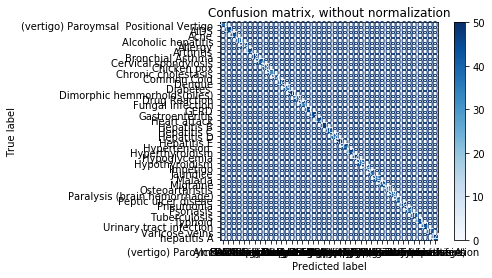

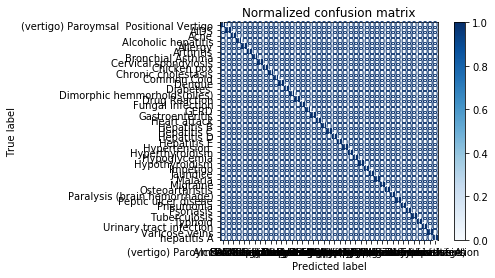

In [0]:

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_dt, x_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [0]:
  print("Random forest classifier")
  from sklearn.ensemble import RandomForestClassifier
  clf4 = RandomForestClassifier()
  clf4 = clf4.fit(x_train,y_train)

  from sklearn.metrics import accuracy_score
  y_pred=clf4.predict(x_test)
  print(accuracy_score(y_test, y_pred))
  print(accuracy_score(y_test, y_pred,normalize=False))

def rf(symptom):
    user_input_symptoms = symptom
    user_input_label = [0 for i in range(132)]
    for i in user_input_symptoms:
        idx = dictionary[i]
        user_input_label[idx] = 1

    user_input_label = np.array(user_input_label)
    user_input_label = user_input_label.reshape((-1,1)).transpose()
    return(clf4.predict(user_input_label))

print(rf(['bruising','congestion','drying_and_tingling_lips','constipation','depression']))

Random forest classifier
1.0
1624
['Dimorphic hemmorhoids(piles)']


Confusion matrix, without normalization
[[37  0  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  0]
 [ 0  0 42 ...  0  0  0]
 ...
 [ 0  0  0 ... 41  0  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  0  0 ...  0  0 44]]
Normalized confusion matrix
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


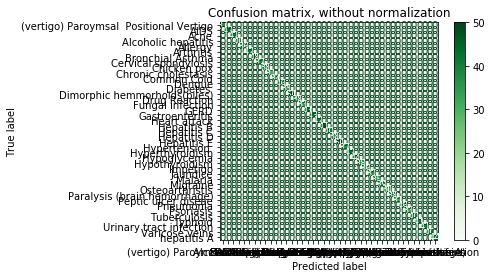

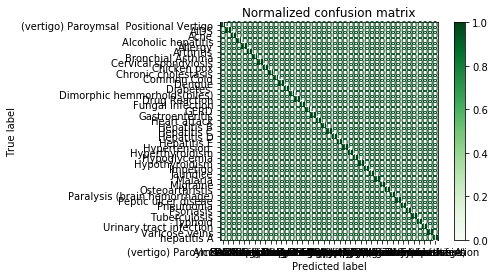

In [0]:

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf4, x_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [0]:
print("Naive Bayes Algorithm")

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb=gnb.fit(x,y)

    # calcul+ating accuracy-------------------------------------------------------------------
# from sklearn.metrics import accuracy_score
# y_pred=gnb.predict(x_test)
# print(accuracy_score(y_test, y_pred))
# print(accuracy_score(y_test, y_pred,normalize=False))
    # -----------------------------------------------------

def nb(symptom):
    user_input_symptoms = symptom
    user_input_label = [0 for i in range(132)]
    for i in user_input_symptoms:
        idx = dictionary[i]
        user_input_label[idx] = 1

    user_input_label = np.array(user_input_label)
    user_input_label = user_input_label.reshape((-1,1)).transpose()
    return(gnb.predict(user_input_label))

print(nb(['bruising','congestion','drying_and_tingling_lips','constipation','depression']))

Naive Bayes Algorithm
['Dimorphic hemmorhoids(piles)']
